In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
# from /data/home/justincho/CheckDST/set_envs_mine.sh
%env CHECKDST_DIR=/data/home/justincho/CheckDST/
%env PARLAI_DIR=/data/home/justincho/CheckDST//ParlAI
%env DATAPATH=/data/home/justincho/CheckDST/data

env: CHECKDST_DIR=/data/home/justincho/CheckDST/
env: PARLAI_DIR=/data/home/justincho/CheckDST//ParlAI
env: DATAPATH=/data/home/justincho/CheckDST/data


In [6]:
# define imports 
from run_checkdst_diagnosis import (
    get_all_parlai_checkdst_results, 
    get_all_trippy_checkdst_results, 
    EPOCHS
)
from checkdst.utils import get_full_df_with_all_results
import os 
from pathlib import Path  
import pandas as pd 

# define constants
DATAPATH = os.environ.get("DATAPATH")
PARLAI_DIR = os.environ.get("PARLAI_DIR")
CHECKDST_DIR = os.environ.get("CHECKDST_DIR")
DATAPATH, PARLAI_DIR, CHECKDST_DIR

('/data/home/justincho/CheckDST/data',
 '/data/home/justincho/CheckDST//ParlAI',
 '/data/home/justincho/CheckDST/')

In [7]:
# where the prediction files are located 
# generation predictions
main_dir=Path(PARLAI_DIR) / "models/bart_pft_multiwoz2.3/"
assert main_dir.is_dir()
scratch_dir=Path(PARLAI_DIR) / "models/bart_scratch_multiwoz2.3/"
assert scratch_dir.is_dir()
soloist_dir=Path(PARLAI_DIR) / "models/bart_soloist_multiwoz2.3/"
assert soloist_dir.is_dir()
muppet_dir=Path(PARLAI_DIR) / "models/bart_muppet_multiwoz2.3/"
assert muppet_dir.is_dir()

# trippy predictions 
trippy_dir=Path(CHECKDST_DIR) / "trippy-public-master/results/emnlp/"
assert trippy_dir.is_dir()
convbert_dir=Path(CHECKDST_DIR) / "dialoglue/trippy/results/emnlp"
assert convbert_dir.is_dir()


In [8]:
### generation results
pft_objs, pft_results = get_all_parlai_checkdst_results(main_dir)
scratch_objs, scratch_results = get_all_parlai_checkdst_results(scratch_dir)
soloist_objs, soloist_results = get_all_parlai_checkdst_results(soloist_dir)
muppet_objs, muppet_results = get_all_parlai_checkdst_results(muppet_dir)
# need to load gpt results 

2022-06-25 07:48:20.598 | INFO     | run_checkdst_diagnosis:get_all_parlai_checkdst_results:169 - Found pickled objs file. Loading...
2022-06-25 07:48:47.548 | INFO     | run_checkdst_diagnosis:get_all_parlai_checkdst_results:173 - Found pickled results file. Loading...
2022-06-25 07:48:47.552 | INFO     | run_checkdst_diagnosis:get_all_parlai_checkdst_results:178 - Loaded both necessary files
2022-06-25 07:48:47.554 | INFO     | run_checkdst_diagnosis:get_all_parlai_checkdst_results:169 - Found pickled objs file. Loading...
2022-06-25 07:49:17.650 | INFO     | run_checkdst_diagnosis:get_all_parlai_checkdst_results:173 - Found pickled results file. Loading...
2022-06-25 07:49:17.653 | INFO     | run_checkdst_diagnosis:get_all_parlai_checkdst_results:178 - Loaded both necessary files
2022-06-25 07:49:17.656 | INFO     | run_checkdst_diagnosis:get_all_parlai_checkdst_results:169 - Found pickled objs file. Loading...
2022-06-25 07:49:51.082 | INFO     | run_checkdst_diagnosis:get_all_parl

In [9]:
### trippy results 
trippy_objs, trippy_results = get_all_trippy_checkdst_results(trippy_dir)
convbert_objs, convbert_results = get_all_trippy_checkdst_results(convbert_dir)

2022-06-25 07:50:19.729 | INFO     | run_checkdst_diagnosis:get_all_trippy_checkdst_results:60 - Found pickled objs file. Loading...
2022-06-25 07:50:50.220 | INFO     | run_checkdst_diagnosis:get_all_trippy_checkdst_results:64 - Found pickled results file. Loading...
2022-06-25 07:50:50.225 | INFO     | run_checkdst_diagnosis:get_all_trippy_checkdst_results:69 - Loaded both necessary files
2022-06-25 07:50:50.229 | INFO     | run_checkdst_diagnosis:get_all_trippy_checkdst_results:60 - Found pickled objs file. Loading...
2022-06-25 07:51:25.841 | INFO     | run_checkdst_diagnosis:get_all_trippy_checkdst_results:64 - Found pickled results file. Loading...
2022-06-25 07:51:25.845 | INFO     | run_checkdst_diagnosis:get_all_trippy_checkdst_results:69 - Loaded both necessary files


In [10]:
### previous results (pre emnlp)
prev_dir=Path(PARLAI_DIR) / "models/pre_emnlp/bart_all_pft_lr5e-6_eps10_ngpu8_bs8_2021-11-11_multiwoz2.3"
assert prev_dir.is_dir()
simpletod_dir=Path(PARLAI_DIR) / "models/pre_emnlp/gpt2_simpletod_multiwoz2.3"
assert simpletod_dir.is_dir()
# prev_objs, prev_results = get_all_parlai_checkdst_results(prev_dir, epochs=[1,2,3,4,5,6,7,8,9,10])
# simpletod_objs, simpletod_results = get_all_parlai_checkdst_results(simpletod_dir, epochs=[1,2,3,4,5,6,7,8,9,10])

In [35]:
from checkdst.utils import print_out_paper_results
from checkdst.utils import plot_checkdst_results


draw_epochs = [0.25, 0.5, 1, 1.5, 2, 5, 10]
# draw_epochs = [0.25, 0.5, 0.75, 1, 1.5, 2, 5, 10]
def print_overview(results, name="", no_legend=False): 
    plot_checkdst_results(results, epochs=draw_epochs, prefix="cjga_orig", model_name=name, no_legend=no_legend) 
    paper_results = print_out_paper_results(results, epochs=EPOCHS)
    return paper_results
    
    


In [12]:
# full_df = get_full_df_with_all_results(convbert_results, epochs=EPOCHS)
# full_df["factuality_NED"] = len(full_df['factuality_NED'])*[1.0]
# full_df

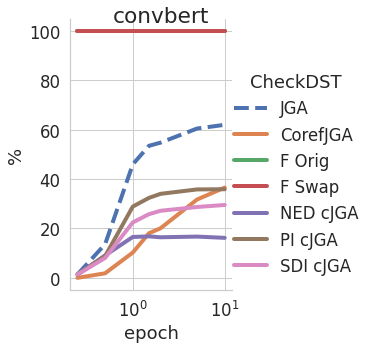

In [13]:
results = convbert_results
paper_results=print_overview(results, "convbert") 

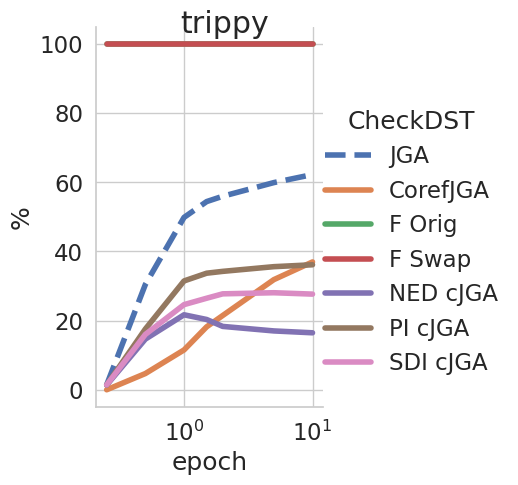

In [14]:
results = trippy_results
paper_results=print_overview(results, "trippy") 

jga_orig                 coref_jga_orig                 factuality_orig  \
        median       sem count         median       sem count          median   
epoch                                                                           
0.25    0.4230  0.054253     5         0.2034  0.044838     5          0.9567   
0.50    0.5161  0.058606     5         0.2575  0.044983     5          0.9393   
0.75    0.5182  0.046402     5         0.2432  0.044216     5          0.9510   
1.00    0.4499  0.069723     5         0.1849  0.026512     5          0.9447   
1.50    0.4495  0.031244     5         0.2091  0.027770     5          0.9500   
2.00    0.4451  0.031918     5         0.2233  0.027693     5          0.9544   
5.00    0.5250  0.061894     5         0.2432  0.035412     5          0.9465   
10.00   0.5213  0.013740     5         0.2902  0.016790     5          0.9415   

                      factuality_NED  ...       cjga_orig_NED                  \
            sem count         median  ... count        median       sem count   
epoch                                 ...                                       
0.25   0.004383     5         0.8770  ...     5        0.0937  0.018335     5   
0.50   0.017912     5         0.8195  ...     5        0.0927  0.017143     5   
0.75   0.005014     5         0.8049  ...     5        0.0887  0.010163     5   
1.00   0.036066     5         0.7210  ...     5        0.0710  0.014746     5   
1.50   0.002631     5         0.8164  ...     5        0.1017  0.008159     5   
2.00   0.003895     5         0.8020  ...     5        0.0880  0.007689     5   
5.00   0.102706     5         0.7484  ...     5        0.0965  0.013332     5   
10.00  0.007723     5         0.6376  ...     5        0.0660  0.006708     5   

      cjga_orig_PI                 cjga_orig_SDI                  
            median       sem count        median       sem count  
epoch                                                             
0.25        0.3526  0.047776     5        0.3048  0.040640     5  
0.50        0.4233  0.048202     5        0.3629  0.042856     5  
0.75        0.4377  0.040258     5        0.3371  0.033511     5  
1.00        0.3800  0.068776     5        0.3234  0.058876     5  
1.50        0.3631  0.026162     5        0.3188  0.024517     5  
2.00        0.3441  0.024135     5        0.2980  0.017348     5  
5.00        0.4186  0.070786     5        0.3572  0.042793     5  
10.00       0.4235  0.012683     5        0.3699  0.014055     5  

[8 rows x 21 columns]

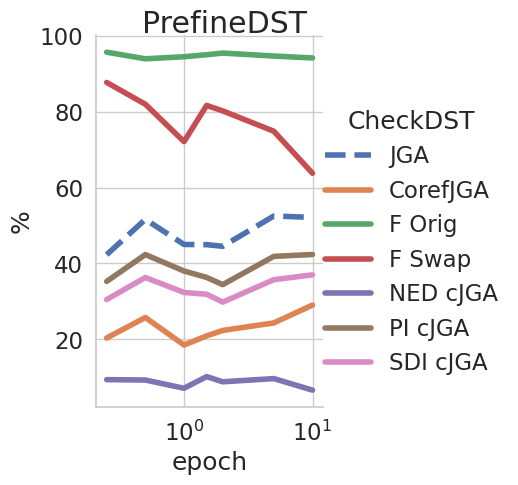

In [15]:
results = scratch_results
print_overview(results, "PrefineDST") 

jga_orig                 coref_jga_orig                 factuality_orig  \
        median       sem count         median       sem count          median   
epoch                                                                           
0.25    0.5007  0.034601     5         0.2447  0.028813     5          0.9593   
0.50    0.4341  0.039383     5         0.2589  0.041555     5          0.9419   
0.75    0.5107  0.036545     5         0.2617  0.034175     5          0.9592   
1.00    0.5293  0.018221     5         0.2674  0.003803     5          0.9498   
1.50    0.5380  0.017348     5         0.2760  0.006607     5          0.9479   
2.00    0.5361  0.016757     5         0.2973  0.010697     5          0.9506   
5.00    0.5544  0.003173     5         0.2987  0.005360     5          0.9516   
10.00   0.5484  0.005162     5         0.2987  0.009770     5          0.9416   

                      factuality_NED  ...       cjga_orig_NED                  \
            sem count         median  ... count        median       sem count   
epoch                                 ...                                       
0.25   0.002988     5         0.9005  ...     5        0.0737  0.011819     5   
0.50   0.001656     5         0.8603  ...     5        0.0946  0.010030     5   
0.75   0.003994     5         0.8090  ...     5        0.0808  0.011295     5   
1.00   0.001121     5         0.8133  ...     5        0.0882  0.007266     5   
1.50   0.003268     5         0.7823  ...     5        0.1146  0.009197     5   
2.00   0.003206     5         0.7991  ...     5        0.0984  0.007696     5   
5.00   0.002200     5         0.7070  ...     5        0.0694  0.004678     5   
10.00  0.002877     5         0.6644  ...     5        0.0653  0.007259     5   

      cjga_orig_PI                 cjga_orig_SDI                  
            median       sem count        median       sem count  
epoch                                                             
0.25        0.4120  0.029229     5        0.3511  0.025157     5  
0.50        0.3400  0.037528     5        0.2694  0.031169     5  
0.75        0.4372  0.032420     5        0.3899  0.027904     5  
1.00        0.4538  0.017117     5        0.3918  0.015711     5  
1.50        0.4416  0.015868     5        0.3779  0.012991     5  
2.00        0.4183  0.030753     5        0.3661  0.022680     5  
5.00        0.4526  0.010415     5        0.4012  0.010087     5  
10.00       0.4308  0.006386     5        0.3675  0.007419     5  

[8 rows x 21 columns]

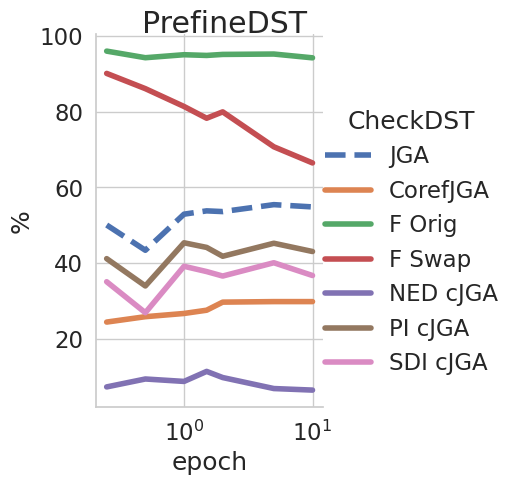

In [16]:
results = pft_results
paper_results=print_overview(results, "PrefineDST") 

paper_results

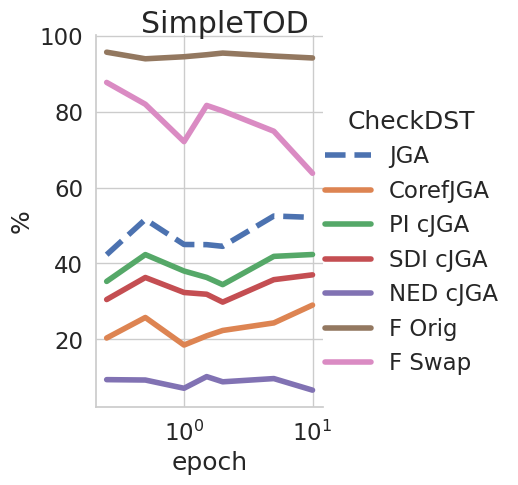

In [32]:
results = scratch_results
paper_result = print_overview(results, "SimpleTOD", no_legend=True)

In [33]:
best.keys()

MultiIndex([(       'jga_orig', 'median'),
            (       'jga_orig',    'sem'),
            (       'jga_orig',  'count'),
            ( 'coref_jga_orig', 'median'),
            ( 'coref_jga_orig',    'sem'),
            ( 'coref_jga_orig',  'count'),
            ('factuality_orig', 'median'),
            ('factuality_orig',    'sem'),
            ('factuality_orig',  'count'),
            ( 'factuality_NED', 'median'),
            ( 'factuality_NED',    'sem'),
            ( 'factuality_NED',  'count'),
            (  'cjga_orig_NED', 'median'),
            (  'cjga_orig_NED',    'sem'),
            (  'cjga_orig_NED',  'count'),
            (   'cjga_orig_PI', 'median'),
            (   'cjga_orig_PI',    'sem'),
            (   'cjga_orig_PI',  'count'),
            (  'cjga_orig_SDI', 'median'),
            (  'cjga_orig_SDI',    'sem'),
            (  'cjga_orig_SDI',  'count')],
           )

In [65]:
best = paper_results[paper_results.index==paper_results['jga_orig', 'median'].idxmax()]
best.iloc[0]
prefix = "cjga_orig"
order = [
        # "seed", 
        "jga_orig", 
        # "jga_valid", 
        "coref_jga_orig", 
        f"{prefix}_PI", 
        f"{prefix}_SDI", 
        f"{prefix}_NED", 
        "factuality_orig",
        "factuality_NED", 
    ]  
str_ = ""
for key in sorted(best.iloc[0].keys(), key=lambda x: order.index(x[0])): 
    # print(key)
    metric, submetric = key
    print(metric)
    if submetric == "median":
        val = best[key].iloc[0]
        str_+=f"${round(val*100,1)}"
    elif submetric == "sem":
        val = best[key].iloc[0]
        str_+=f"_{{{round(val*100,1)}}}$ & "
    else: 
        continue 
    # print(f"{best[key]['median']}_{{{best[key]['sem']}}}", end="&")
print(str_[:-2] + "\\\\")


jga_orig
jga_orig
jga_orig
coref_jga_orig
coref_jga_orig
coref_jga_orig
cjga_orig_PI
cjga_orig_PI
cjga_orig_PI
cjga_orig_SDI
cjga_orig_SDI
cjga_orig_SDI
cjga_orig_NED
cjga_orig_NED
cjga_orig_NED
factuality_orig
factuality_orig
factuality_orig
factuality_NED
factuality_NED
factuality_NED
$55.4_{0.3}$ & $29.9_{0.5}$ & $45.3_{1.0}$ & $40.1_{1.0}$ & $6.9_{0.5}$ & $95.2_{0.2}$ & $70.7_{1.4}$ \


In [18]:
paper_results[paper_results.index==paper_results['jga_orig', 'median'].idxmax()]

jga_orig                 coref_jga_orig                factuality_orig  \
        median       sem count         median      sem count          median   
epoch                                                                          
5.0     0.5544  0.003173     5         0.2987  0.00536     5          0.9516   

                    factuality_NED  ...       cjga_orig_NED                  \
          sem count         median  ... count        median       sem count   
epoch                               ...                                       
5.0    0.0022     5          0.707  ...     5        0.0694  0.004678     5   

      cjga_orig_PI                 cjga_orig_SDI                  
            median       sem count        median       sem count  
epoch                                                             
5.0         0.4526  0.010415     5        0.4012  0.010087     5  

[1 rows x 21 columns]

In [19]:
paper_results['cjga_orig_PI', 'median'].idxmax(), paper_results['cjga_orig_SDI', 'median'].idxmax(), paper_results['cjga_orig_NED', 'median'].idxmax(), paper_results['jga_orig', 'median'].idxmax()

(1.0, 5.0, 1.5, 5.0)